In [1]:
%load_ext autoreload
%autoreload 2
import ziff.ziff 

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

03:38:34 INFO:test


In [2]:
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]


In [31]:
z.eval_func('set_config_value',key_path = 'i/o,nstars',value=2000)
ziff = z.ziffs[0]
ziff.build_default_catalog()

Building default catalogs


In [32]:
ziff.catalog['gaia_full'][0].df
ziff.save_all_cats()

In [33]:
from astropy.io import fits
f = fits.open('/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits')
len(f[1].data['Source'])

468

In [42]:
        from ziff.catalog import *
        self = ziff
        num =0
        subziff = self.create_singleimg_ziff(num)
        c = ReferenceCatalog(ziff = subziff, which = 'gaia', name = 'gaia_calibration') # Catalog object
        c.download() # fetch gaia catalog
        # Filters
        c.set_is_isolated()
        c.set_mask_pixels()
        c.add_filter('Gmag',[13,16], name = 'mag_filter')
        c.add_filter('xpos',[20,3030], name = 'border_filter_x')
        c.add_filter('ypos',[20,3030], name = 'border_filter_y')
        c.add_filter('is_isolated',[1,2], name = 'isolated_filter')
        c.add_filter('has_badpix', [-0.5, 0.5], 'filter_badpix')
        c.df['ra'] = c.df['RA_ICRS']
        c.df['dec'] = c.df['DE_ICRS']
        c.set_sky()
        c2 = c.copy('gaia_full')
        print(c2.df.loc[c2.df['filter']==1])
        c2.remove_filter('mag_filter')
        #c2.add_filter('Gmag',[12,18], name = 'mag_filter')

                        RA_ICRS  e_RA_ICRS    DE_ICRS     Gmag    RPmag  \
Source                                                                    
1244817110204416384  208.245053     0.0298  18.031279  15.8107  15.0777   
1244817694319970816  208.174475     0.0287  18.042962  15.4801  14.9861   
1244818209716048512  208.203376     0.0218  18.077302  14.8869  14.2634   
1244819721544537856  208.071992     0.0205  18.070691  14.5891  14.1164   
1244820546178259712  208.037693     0.0156  18.092060  13.2011  12.7245   
...                         ...        ...        ...      ...      ...   
1245158611643945216  208.284119     0.0346  18.759116  15.1542  14.5344   
1245160123472443392  208.443058     0.0631  18.816071  14.9454  13.8980   
1245160741947699456  208.343576     0.0345  18.825169  15.7158  15.2126   
1245160776307438080  208.369405     0.0975  18.834028  13.5243  12.9333   
1245163250208604032  208.171277     0.0415  18.844058  15.9211  15.3787   

                       B

In [3]:
z =  ziff.ziff.ZiffCollection(imgs,logger=logger)

Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs


In [4]:
z.eval_func('set_config_value',key_path = 'psf,interp,order',value=6)
z.eval_func('set_config_value',key_path = 'psf,outliers,max_remove',value=20)
z.eval_func('set_config_value',key_path = 'i/o,nstars',value=2000)

[None, None, None, None]

In [5]:
z.eval_func('run_piff',catalog='gaia_calibration',overwrite_cat = True)

04:35:13 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
04:35:13 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
04:35:13 WARNING:Iteration 1: Fitting 148 stars
04:35:56 INFO:Beginning solution of matrix size (6300, 6300)
04:35:58 INFO:Ill-conditioned matrix (rcond=6.16823e-48): result may not be accurate.
04:35:59 WARNING:             Total chisq = 21743.30 / 33210 dof
04:35:59 WARNING:Iteration 2: Fitting 148 stars
04:36:42 INFO:Beginning solution of matrix size (6300, 6300)
04:36:44 INFO:Ill-conditioned matrix (rcond=6.1539e-48): result may not be accurate.
04:36:45 INFO:Found 13 stars with chisq > thresh
04:36:45 INFO:             Removed 13 outliers
04:36:45 WARNING:             Total chisq = 8120.74 / 30295 dof
04:36:45 WARNING:Iteration 3: Fitting 135 stars
04:37:24 INFO:Beginning solution of matrix siz

04:37:28 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
04:37:29 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
04:37:29 WARNING:Iteration 1: Fitting 184 stars
04:38:15 INFO:Beginning solution of matrix size (6300, 6300)
04:38:17 INFO:Ill-conditioned matrix (rcond=3.25369e-56): result may not be accurate.
04:38:18 WARNING:             Total chisq = 18678.70 / 41219 dof
04:38:18 WARNING:Iteration 2: Fitting 184 stars
04:39:15 INFO:Beginning solution of matrix size (6300, 6300)
04:39:16 INFO:Ill-conditioned matrix (rcond=3.22609e-56): result may not be accurate.
04:39:17 INFO:Found 5 stars with chisq > thresh
04:39:17 INFO:             Removed 5 outliers
04:39:17 WARNING:             Total chisq = 8096.20 / 40094 dof
04:39:17 WARNING:Iteration 3: Fitting 179 stars
04:40:01 INFO:Beginning solution of matrix size

04:40:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
04:40:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
04:40:05 WARNING:Iteration 1: Fitting 171 stars
04:40:46 INFO:Beginning solution of matrix size (6300, 6300)
04:40:48 INFO:Ill-conditioned matrix (rcond=8.45588e-58): result may not be accurate.
04:40:48 WARNING:             Total chisq = 8931.42 / 38272 dof
04:40:48 WARNING:Iteration 2: Fitting 171 stars
04:41:32 INFO:Beginning solution of matrix size (6300, 6300)
04:41:34 INFO:Ill-conditioned matrix (rcond=8.70019e-58): result may not be accurate.
04:41:35 INFO:Found 5 stars with chisq > thresh
04:41:35 INFO:             Removed 5 outliers
04:41:35 WARNING:             Total chisq = 6764.68 / 37153 dof
04:41:35 WARNING:Iteration 3: Fitting 166 stars
04:42:15 INFO:Beginning solution of matrix size 

04:42:18 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
04:42:19 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
04:42:19 WARNING:Iteration 1: Fitting 153 stars
04:42:56 INFO:Beginning solution of matrix size (6300, 6300)
04:42:58 INFO:Ill-conditioned matrix (rcond=1.31828e-56): result may not be accurate.
04:42:58 WARNING:             Total chisq = 18567.49 / 34355 dof
04:42:58 WARNING:Iteration 2: Fitting 153 stars
04:43:39 INFO:Beginning solution of matrix size (6300, 6300)
04:43:42 INFO:Ill-conditioned matrix (rcond=1.31564e-56): result may not be accurate.
04:43:42 INFO:Found 8 stars with chisq > thresh
04:43:42 INFO:             Removed 8 outliers
04:43:42 WARNING:             Total chisq = 5515.82 / 32555 dof
04:43:42 WARNING:Iteration 3: Fitting 145 stars
04:44:23 INFO:Beginning solution of matrix size

[None, None, None, None]

In [6]:
z.eval_func('set_config_value',key_path = 'i/o,nstars',value=2000)
stars = z.eval_func('make_stars',catalog='gaia_full')
new_stars = z.eval_func_stars('reflux_stars',stars_list = stars, fit_center=False, use_minuit=False)
res = z.eval_func_stars('compute_residuals',stars_list = new_stars)
shapes = z.eval_func_stars('compute_shapes',stars)


04:45:21 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
04:45:21 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
04:45:21 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits.
04:45:21 INFO:Processing catalog 0 with 468 stars
04:45:21 WARNING:Read a total of 468 stars from 1 image


04:45:22 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
04:45:22 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
04:45:22 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_gaia_full.fits.
04:45:22 INFO:Processing catalog 0 with 549 stars
04:45:22 WARNING:Read a total of 549 stars from 1 image


04:45:23 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
04:45:23 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
04:45:23 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_gaia_full.fits.
04:45:23 INFO:Processing catalog 0 with 522 stars
04:45:23 WARNING:Read a total of 522 stars from 1 image


04:45:24 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
04:45:24 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
04:45:24 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_gaia_full.fits.
04:45:24 INFO:Processing catalog 0 with 508 stars
04:45:24 WARNING:Read a total of 508 stars from 1 image
04:45:25 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits


Processing 1/468
Processing 2/468
Processing 3/468
Processing 4/468
Processing 5/468
Processing 6/468
Processing 7/468
Processing 8/468
Processing 9/468
Processing 10/468
Processing 11/468
Processing 12/468
Processing 13/468
Processing 14/468
Processing 15/468
Processing 16/468
Processing 17/468
Processing 18/468
Processing 19/468
Processing 20/468
Processing 21/468
Processing 22/468
Processing 23/468
Processing 24/468
Processing 25/468
Processing 26/468
Processing 27/468
Processing 28/468
Processing 29/468
Processing 30/468
Processing 31/468
Processing 32/468
Processing 33/468
Processing 34/468
Processing 35/468
Processing 36/468
Processing 37/468
Processing 38/468
Processing 39/468
Processing 40/468
Processing 41/468
Processing 42/468
Processing 43/468
Processing 44/468
Processing 45/468
Processing 46/468
Processing 47/468
Processing 48/468
Processing 49/468
Processing 50/468
Processing 51/468
Processing 52/468
Processing 53/468
Processing 54/468
Processing 55/468
Processing 56/468
P

Processing 456/468
Processing 457/468
Processing 458/468
Processing 459/468
Processing 460/468
Processing 461/468
Processing 462/468
Processing 463/468
Processing 464/468
Processing 465/468
Processing 466/468
Processing 467/468
Processing 468/468


04:45:27 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits


Processing 1/549
Processing 2/549
Processing 3/549
Processing 4/549
Processing 5/549
Processing 6/549
Processing 7/549
Processing 8/549
Processing 9/549
Processing 10/549
Processing 11/549
Processing 12/549
Processing 13/549
Processing 14/549
Processing 15/549
Processing 16/549
Processing 17/549
Processing 18/549
Processing 19/549
Processing 20/549
Processing 21/549
Processing 22/549
Processing 23/549
Processing 24/549
Processing 25/549
Processing 26/549
Processing 27/549
Processing 28/549
Processing 29/549
Processing 30/549
Processing 31/549
Processing 32/549
Processing 33/549
Processing 34/549
Processing 35/549
Processing 36/549
Processing 37/549
Processing 38/549
Processing 39/549
Processing 40/549
Processing 41/549
Processing 42/549
Processing 43/549
Processing 44/549
Processing 45/549
Processing 46/549
Processing 47/549
Processing 48/549
Processing 49/549
Processing 50/549
Processing 51/549
Processing 52/549
Processing 53/549
Processing 54/549
Processing 55/549
Processing 56/549
P

Processing 457/549
Processing 458/549
Processing 459/549
Processing 460/549
Processing 461/549
Processing 462/549
Processing 463/549
Processing 464/549
Processing 465/549
Processing 466/549
Processing 467/549
Processing 468/549
Processing 469/549
Processing 470/549
Processing 471/549
Processing 472/549
Processing 473/549
Processing 474/549
Processing 475/549
Processing 476/549
Processing 477/549
Processing 478/549
Processing 479/549
Processing 480/549
Processing 481/549
Processing 482/549
Processing 483/549
Processing 484/549
Processing 485/549
Processing 486/549
Processing 487/549
Processing 488/549
Processing 489/549
Processing 490/549
Processing 491/549
Processing 492/549
Processing 493/549
Processing 494/549
Processing 495/549
Processing 496/549
Processing 497/549
Processing 498/549
Processing 499/549
Processing 500/549
Processing 501/549
Processing 502/549
Processing 503/549
Processing 504/549
Processing 505/549
Processing 506/549
Processing 507/549
Processing 508/549
Processing 5

04:45:29 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits


Processing 1/522
Processing 2/522
Processing 3/522
Processing 4/522
Processing 5/522
Processing 6/522
Processing 7/522
Processing 8/522
Processing 9/522
Processing 10/522
Processing 11/522
Processing 12/522
Processing 13/522
Processing 14/522
Processing 15/522
Processing 16/522
Processing 17/522
Processing 18/522
Processing 19/522
Processing 20/522
Processing 21/522
Processing 22/522
Processing 23/522
Processing 24/522
Processing 25/522
Processing 26/522
Processing 27/522
Processing 28/522
Processing 29/522
Processing 30/522
Processing 31/522
Processing 32/522
Processing 33/522
Processing 34/522
Processing 35/522
Processing 36/522
Processing 37/522
Processing 38/522
Processing 39/522
Processing 40/522
Processing 41/522
Processing 42/522
Processing 43/522
Processing 44/522
Processing 45/522
Processing 46/522
Processing 47/522
Processing 48/522
Processing 49/522
Processing 50/522
Processing 51/522
Processing 52/522
Processing 53/522
Processing 54/522
Processing 55/522
Processing 56/522
P

Processing 466/522
Processing 467/522
Processing 468/522
Processing 469/522
Processing 470/522
Processing 471/522
Processing 472/522
Processing 473/522
Processing 474/522
Processing 475/522
Processing 476/522
Processing 477/522
Processing 478/522
Processing 479/522
Processing 480/522
Processing 481/522
Processing 482/522
Processing 483/522
Processing 484/522
Processing 485/522
Processing 486/522
Processing 487/522
Processing 488/522
Processing 489/522
Processing 490/522
Processing 491/522
Processing 492/522
Processing 493/522
Processing 494/522
Processing 495/522
Processing 496/522
Processing 497/522
Processing 498/522
Processing 499/522
Processing 500/522
Processing 501/522
Processing 502/522
Processing 503/522
Processing 504/522
Processing 505/522
Processing 506/522
Processing 507/522
Processing 508/522
Processing 509/522
Processing 510/522
Processing 511/522
Processing 512/522
Processing 513/522
Processing 514/522
Processing 515/522
Processing 516/522
Processing 517/522
Processing 5

04:45:31 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits


Processing 1/508
Processing 2/508
Processing 3/508
Processing 4/508
Processing 5/508
Processing 6/508
Processing 7/508
Processing 8/508
Processing 9/508
Processing 10/508
Processing 11/508
Processing 12/508
Processing 13/508
Processing 14/508
Processing 15/508
Processing 16/508
Processing 17/508
Processing 18/508
Processing 19/508
Processing 20/508
Processing 21/508
Processing 22/508
Processing 23/508
Processing 24/508
Processing 25/508
Processing 26/508
Processing 27/508
Processing 28/508
Processing 29/508
Processing 30/508
Processing 31/508
Processing 32/508
Processing 33/508
Processing 34/508
Processing 35/508
Processing 36/508
Processing 37/508
Processing 38/508
Processing 39/508
Processing 40/508
Processing 41/508
Processing 42/508
Processing 43/508
Processing 44/508
Processing 45/508
Processing 46/508
Processing 47/508
Processing 48/508
Processing 49/508
Processing 50/508
Processing 51/508
Processing 52/508
Processing 53/508
Processing 54/508
Processing 55/508
Processing 56/508
P

Processing 473/508
Processing 474/508
Processing 475/508
Processing 476/508
Processing 477/508
Processing 478/508
Processing 479/508
Processing 480/508
Processing 481/508
Processing 482/508
Processing 483/508
Processing 484/508
Processing 485/508
Processing 486/508
Processing 487/508
Processing 488/508
Processing 489/508
Processing 490/508
Processing 491/508
Processing 492/508
Processing 493/508
Processing 494/508
Processing 495/508
Processing 496/508
Processing 497/508
Processing 498/508
Processing 499/508
Processing 500/508
Processing 501/508
Processing 502/508
Processing 503/508
Processing 504/508
Processing 505/508
Processing 506/508
Processing 507/508
Processing 508/508


<IPython.core.display.Javascript object>


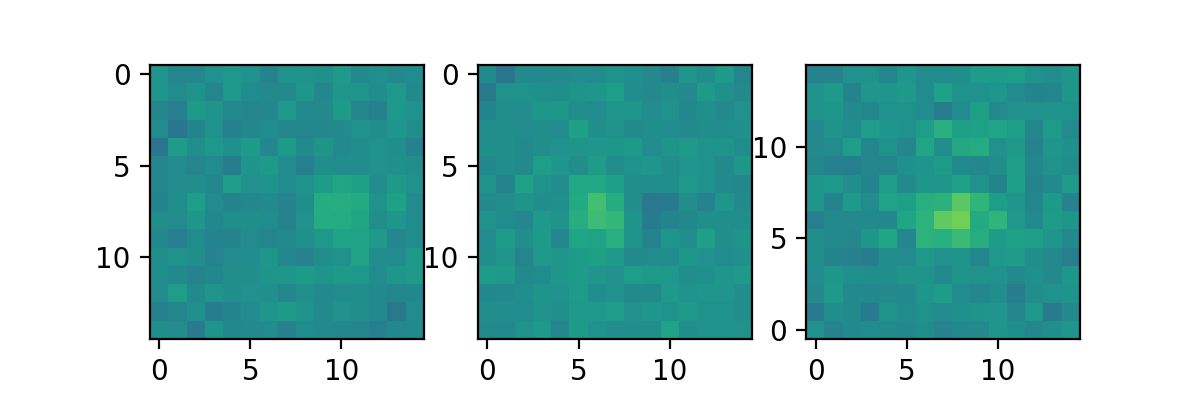

In [7]:
%matplotlib notebook
fig, axes = P.subplots(1,3,figsize=(6,2))
axes[0].imshow(N.median(res[0],axis=0),vmin=-0.05,vmax=0.05)
axes[1].imshow(N.median(res[1],axis=0),vmin=-0.05,vmax=0.05)
axes[2].imshow(N.median(N.vstack(res),axis=0).T,vmin=-0.02,vmax=0.02,origin='lower')




In [21]:
import numpy as np
keys = shapes[0].keys()
s = {}
for k in keys:
    s[k] = []
for i in range(4):
    for k in keys:
        s[k] = np.hstack([s[k],shapes[i][k]])
print(s)
shapes=s

{'instru_flux': array([1., 1., 1., ..., 1., 1., 1.]), 'T_data': array([1.36697075, 1.47576926, 1.42242135, ..., 2.01380634, 1.58465118,
       1.41839309]), 'T_model': array([1.37189469, 1.40152604, 1.35983962, ..., 1.36276465, 1.36932696,
       1.38816044]), 'g1_data': array([-0.0589666 ,  0.01106809, -0.05337229, ...,  0.03771447,
       -0.05414027, -0.06633175]), 'g2_data': array([-0.05616336, -0.02085717, -0.06879487, ..., -0.11219747,
       -0.06407411, -0.04430132]), 'g1_model': array([-0.07782175, -0.08189322, -0.07526219, ..., -0.0645622 ,
       -0.05904739, -0.04840331]), 'g2_model': array([-0.04342859, -0.04256395, -0.04468396, ..., -0.03991845,
       -0.03776975, -0.03349313]), 'u': array([2793.45760037, 2976.41566535, 2897.79183658, ..., 1827.24800909,
       1786.93576727, 1873.2846531 ]), 'v': array([-3353.15254145, -3389.66744067, -3238.07347875, ...,
       -3614.45096229, -3540.20030944, -3471.71827517]), 'flag_data': array([0., 0., 0., ..., 0., 0., 0.]), 'flag_mo

<IPython.core.display.Javascript object>


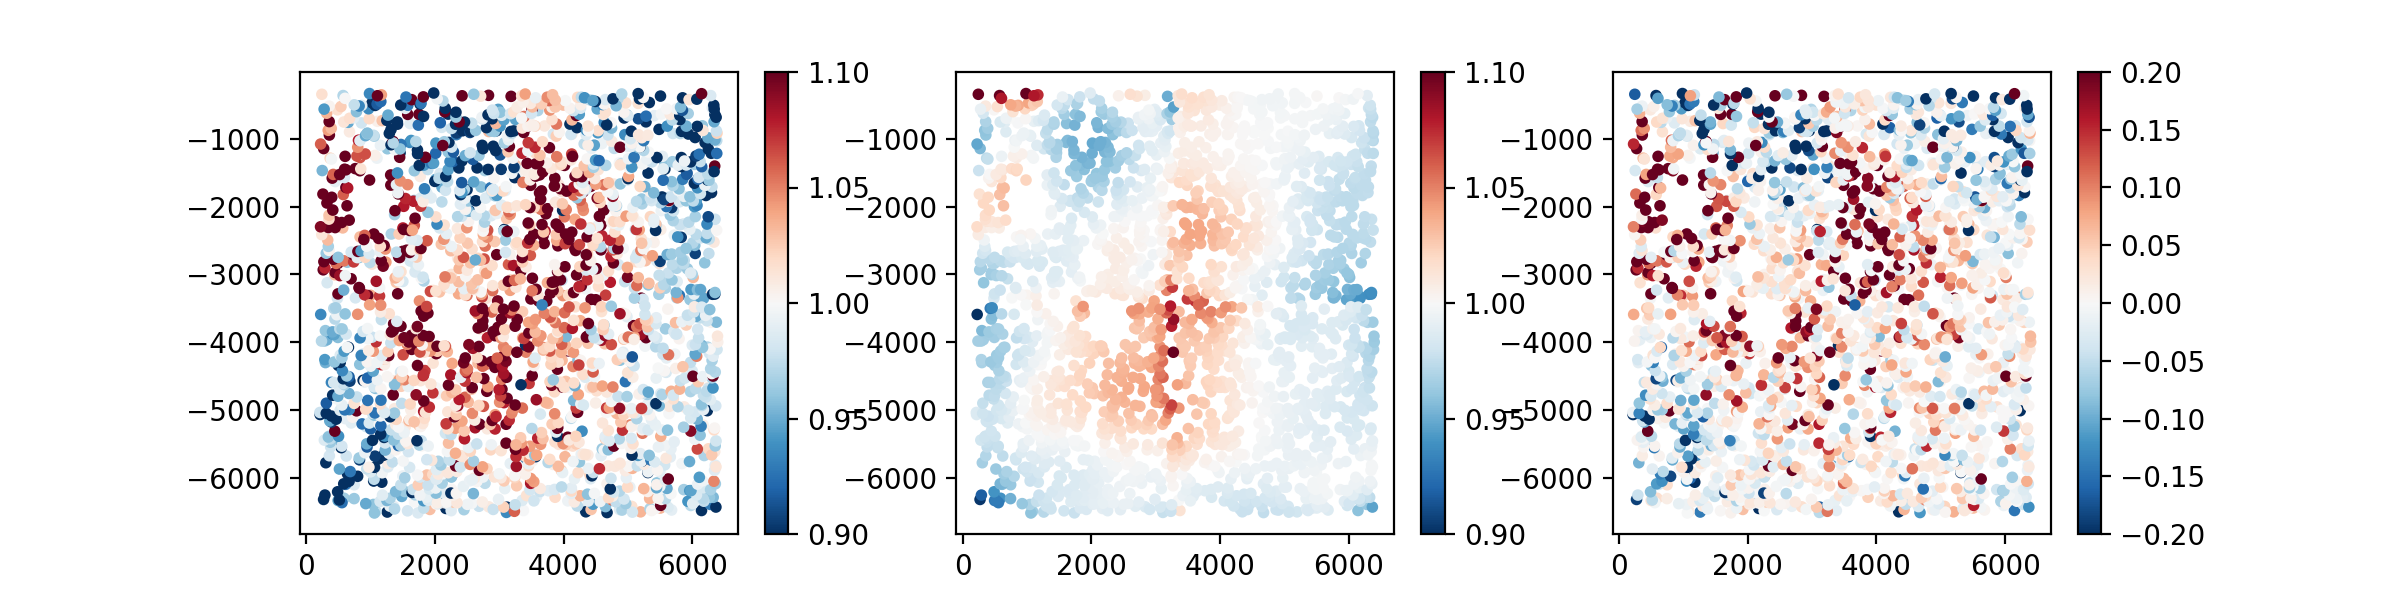

In [22]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
cmap = 'RdBu_r'
size=10
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=size,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=size,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=size,vmin=-0.2,vmax=0.2,cmap=cmap)
fig.colorbar(s,ax=axes[2])


In [23]:
print(np.mean(np.asarray(shapes['T_data'])-np.asarray(shapes['T_model'])))
print(np.std(np.asarray(shapes['T_data'])-np.asarray(shapes['T_model'])))


0.03535541126252149
0.5243498570700054


In [10]:
cmap = 'RdBu_r'
z.eval_func('set_config_value',key_path = 'i/o,nstars',value=2000)
stars = z.eval_func('make_stars',catalog='gaia_full')
new_stars = z.eval_func_stars('reflux_stars',stars_list = stars, fit_center=False, use_minuit=False)
res = z.eval_func_stars('compute_residuals',stars_list = new_stars)

09:12:33 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
09:12:33 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
09:12:34 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits.
09:12:34 INFO:Processing catalog 0 with 468 stars
09:12:34 WARNING:Read a total of 468 stars from 1 image


09:12:34 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
09:12:34 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
09:12:34 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_gaia_full.fits.
09:12:34 INFO:Processing catalog 0 with 549 stars
09:12:35 WARNING:Read a total of 549 stars from 1 image


09:12:35 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
09:12:35 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
09:12:35 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_gaia_full.fits.
09:12:35 INFO:Processing catalog 0 with 522 stars
09:12:36 WARNING:Read a total of 522 stars from 1 image


09:12:36 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
09:12:36 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
09:12:36 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_gaia_full.fits.
09:12:36 INFO:Processing catalog 0 with 508 stars
09:12:37 WARNING:Read a total of 508 stars from 1 image
09:12:37 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits


Processing 1/468
Processing 2/468
Processing 3/468
Processing 4/468
Processing 5/468
Processing 6/468
Processing 7/468
Processing 8/468
Processing 9/468
Processing 10/468
Processing 11/468
Processing 12/468
Processing 13/468
Processing 14/468
Processing 15/468
Processing 16/468
Processing 17/468
Processing 18/468
Processing 19/468
Processing 20/468
Processing 21/468
Processing 22/468
Processing 23/468
Processing 24/468
Processing 25/468
Processing 26/468
Processing 27/468
Processing 28/468
Processing 29/468
Processing 30/468
Processing 31/468
Processing 32/468
Processing 33/468
Processing 34/468
Processing 35/468
Processing 36/468
Processing 37/468
Processing 38/468
Processing 39/468
Processing 40/468
Processing 41/468
Processing 42/468
Processing 43/468
Processing 44/468
Processing 45/468
Processing 46/468
Processing 47/468
Processing 48/468
Processing 49/468
Processing 50/468
Processing 51/468
Processing 52/468
Processing 53/468
Processing 54/468
Processing 55/468
Processing 56/468
P

Processing 439/468
Processing 440/468
Processing 441/468
Processing 442/468
Processing 443/468
Processing 444/468
Processing 445/468
Processing 446/468
Processing 447/468
Processing 448/468
Processing 449/468
Processing 450/468
Processing 451/468
Processing 452/468
Processing 453/468
Processing 454/468
Processing 455/468
Processing 456/468
Processing 457/468
Processing 458/468
Processing 459/468
Processing 460/468
Processing 461/468
Processing 462/468
Processing 463/468
Processing 464/468
Processing 465/468
Processing 466/468
Processing 467/468
Processing 468/468


09:13:20 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits


Processing 1/549
Processing 2/549
Processing 3/549
Processing 4/549
Processing 5/549
Processing 6/549
Processing 7/549
Processing 8/549
Processing 9/549
Processing 10/549
Processing 11/549
Processing 12/549
Processing 13/549
Processing 14/549
Processing 15/549
Processing 16/549
Processing 17/549
Processing 18/549
Processing 19/549
Processing 20/549
Processing 21/549
Processing 22/549
Processing 23/549
Processing 24/549
Processing 25/549
Processing 26/549
Processing 27/549
Processing 28/549
Processing 29/549
Processing 30/549
Processing 31/549
Processing 32/549
Processing 33/549
Processing 34/549
Processing 35/549
Processing 36/549
Processing 37/549
Processing 38/549
Processing 39/549
Processing 40/549
Processing 41/549
Processing 42/549
Processing 43/549
Processing 44/549
Processing 45/549
Processing 46/549
Processing 47/549
Processing 48/549
Processing 49/549
Processing 50/549
Processing 51/549
Processing 52/549
Processing 53/549
Processing 54/549
Processing 55/549
Processing 56/549
P

Processing 438/549
Processing 439/549
Processing 440/549
Processing 441/549
Processing 442/549
Processing 443/549
Processing 444/549
Processing 445/549
Processing 446/549
Processing 447/549
Processing 448/549
Processing 449/549
Processing 450/549
Processing 451/549
Processing 452/549
Processing 453/549
Processing 454/549
Processing 455/549
Processing 456/549
Processing 457/549
Processing 458/549
Processing 459/549
Processing 460/549
Processing 461/549
Processing 462/549
Processing 463/549
Processing 464/549
Processing 465/549
Processing 466/549
Processing 467/549
Processing 468/549
Processing 469/549
Processing 470/549
Processing 471/549
Processing 472/549
Processing 473/549
Processing 474/549
Processing 475/549
Processing 476/549
Processing 477/549
Processing 478/549
Processing 479/549
Processing 480/549
Processing 481/549
Processing 482/549
Processing 483/549
Processing 484/549
Processing 485/549
Processing 486/549
Processing 487/549
Processing 488/549
Processing 489/549
Processing 4

09:14:06 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits


Processing 1/522
Processing 2/522
Processing 3/522
Processing 4/522
Processing 5/522
Processing 6/522
Processing 7/522
Processing 8/522
Processing 9/522
Processing 10/522
Processing 11/522
Processing 12/522
Processing 13/522
Processing 14/522
Processing 15/522
Processing 16/522
Processing 17/522
Processing 18/522
Processing 19/522
Processing 20/522
Processing 21/522
Processing 22/522
Processing 23/522
Processing 24/522
Processing 25/522
Processing 26/522
Processing 27/522
Processing 28/522
Processing 29/522
Processing 30/522
Processing 31/522
Processing 32/522
Processing 33/522
Processing 34/522
Processing 35/522
Processing 36/522
Processing 37/522
Processing 38/522
Processing 39/522
Processing 40/522
Processing 41/522
Processing 42/522
Processing 43/522
Processing 44/522
Processing 45/522
Processing 46/522
Processing 47/522
Processing 48/522
Processing 49/522
Processing 50/522
Processing 51/522
Processing 52/522
Processing 53/522
Processing 54/522
Processing 55/522
Processing 56/522
P

Processing 438/522
Processing 439/522
Processing 440/522
Processing 441/522
Processing 442/522
Processing 443/522
Processing 444/522
Processing 445/522
Processing 446/522
Processing 447/522
Processing 448/522
Processing 449/522
Processing 450/522
Processing 451/522
Processing 452/522
Processing 453/522
Processing 454/522
Processing 455/522
Processing 456/522
Processing 457/522
Processing 458/522
Processing 459/522
Processing 460/522
Processing 461/522
Processing 462/522
Processing 463/522
Processing 464/522
Processing 465/522
Processing 466/522
Processing 467/522
Processing 468/522
Processing 469/522
Processing 470/522
Processing 471/522
Processing 472/522
Processing 473/522
Processing 474/522
Processing 475/522
Processing 476/522
Processing 477/522
Processing 478/522
Processing 479/522
Processing 480/522
Processing 481/522
Processing 482/522
Processing 483/522
Processing 484/522
Processing 485/522
Processing 486/522
Processing 487/522
Processing 488/522
Processing 489/522
Processing 4

09:14:48 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits


Processing 1/508
Processing 2/508
Processing 3/508
Processing 4/508
Processing 5/508
Processing 6/508
Processing 7/508
Processing 8/508
Processing 9/508
Processing 10/508
Processing 11/508
Processing 12/508
Processing 13/508
Processing 14/508
Processing 15/508
Processing 16/508
Processing 17/508
Processing 18/508
Processing 19/508
Processing 20/508
Processing 21/508
Processing 22/508
Processing 23/508
Processing 24/508
Processing 25/508
Processing 26/508
Processing 27/508
Processing 28/508
Processing 29/508
Processing 30/508
Processing 31/508
Processing 32/508
Processing 33/508
Processing 34/508
Processing 35/508
Processing 36/508
Processing 37/508
Processing 38/508
Processing 39/508
Processing 40/508
Processing 41/508
Processing 42/508
Processing 43/508
Processing 44/508
Processing 45/508
Processing 46/508
Processing 47/508
Processing 48/508
Processing 49/508
Processing 50/508
Processing 51/508
Processing 52/508
Processing 53/508
Processing 54/508
Processing 55/508
Processing 56/508
P

Processing 439/508
Processing 440/508
Processing 441/508
Processing 442/508
Processing 443/508
Processing 444/508
Processing 445/508
Processing 446/508
Processing 447/508
Processing 448/508
Processing 449/508
Processing 450/508
Processing 451/508
Processing 452/508
Processing 453/508
Processing 454/508
Processing 455/508
Processing 456/508
Processing 457/508
Processing 458/508
Processing 459/508
Processing 460/508
Processing 461/508
Processing 462/508
Processing 463/508
Processing 464/508
Processing 465/508
Processing 466/508
Processing 467/508
Processing 468/508
Processing 469/508
Processing 470/508
Processing 471/508
Processing 472/508
Processing 473/508
Processing 474/508
Processing 475/508
Processing 476/508
Processing 477/508
Processing 478/508
Processing 479/508
Processing 480/508
Processing 481/508
Processing 482/508
Processing 483/508
Processing 484/508
Processing 485/508
Processing 486/508
Processing 487/508
Processing 488/508
Processing 489/508
Processing 490/508
Processing 4

<IPython.core.display.Javascript object>


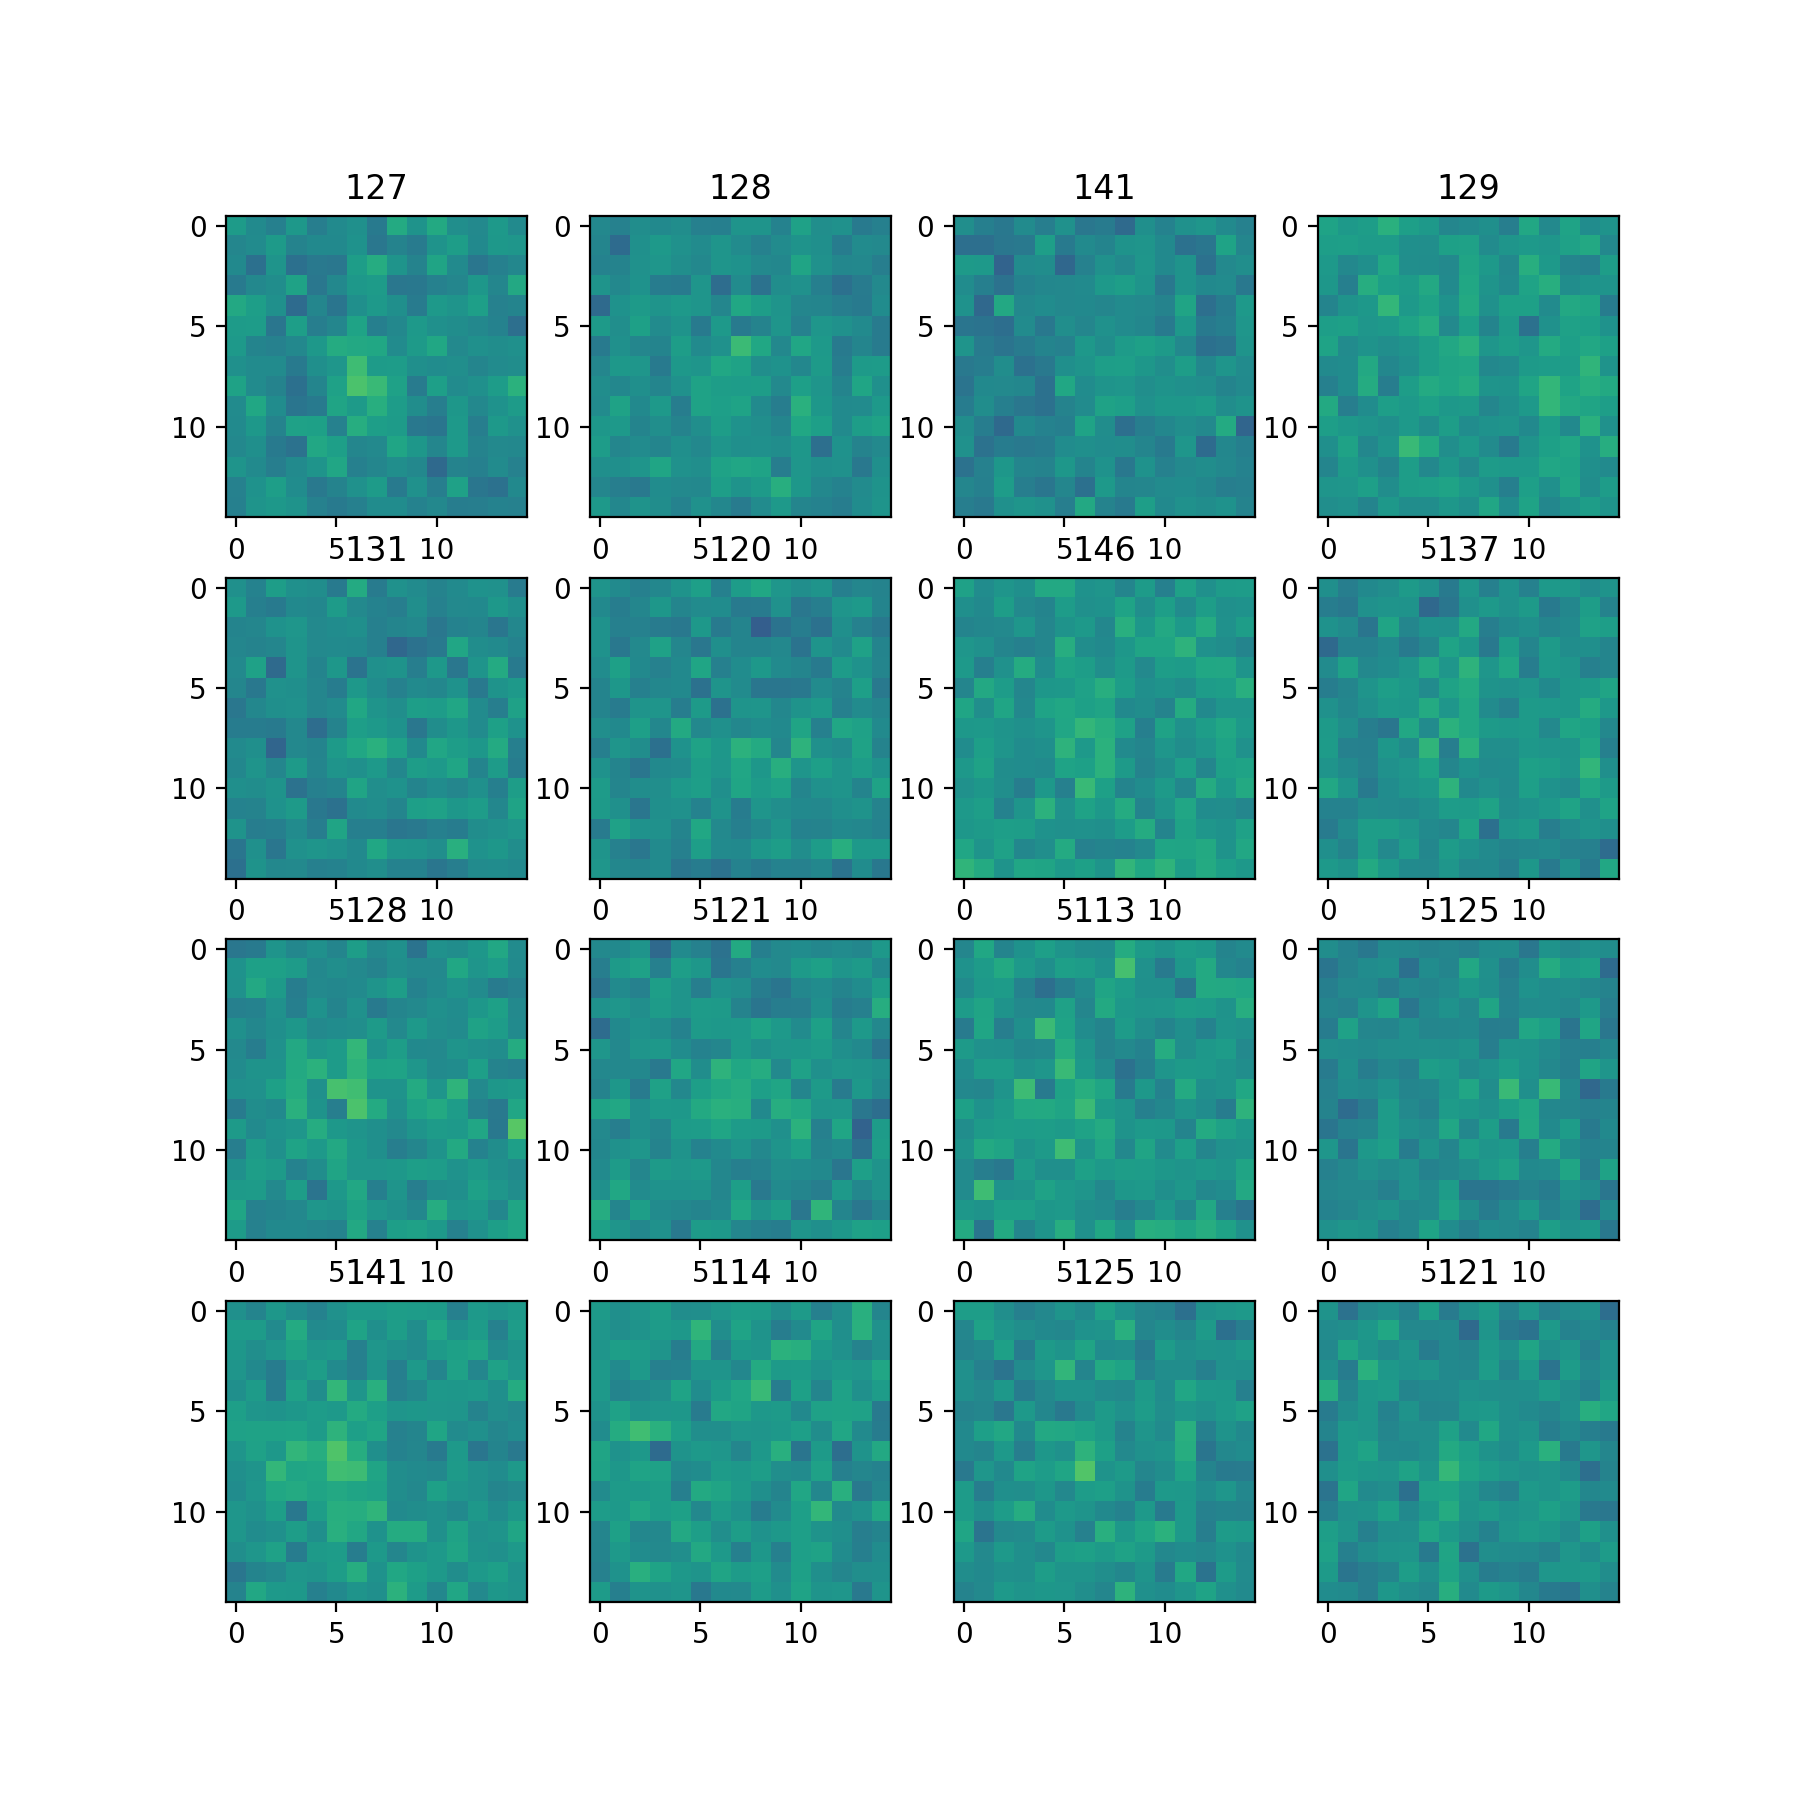

In [8]:
# BINNED BY POSITION

x = N.vstack([N.vstack([float(s.x+0*s.center_to_offset(s.center)[0])%1 for s in star]) for star in stars]).flatten()
y = N.vstack([N.vstack([float(s.y+0*s.center_to_offset(s.center)[1])%1 for s in star]) for star in stars]).flatten()

res2 = N.vstack(res)

#i=0
#x = [float(s.x+0*s.center_to_offset(s.center)[0])%1 for s in stars[i]]
#y = [float(s.y+0*s.center_to_offset(s.center)[1])%1 for s in stars[i]]
#res2=res[i]

from scipy.stats import binned_statistic_2d
nbins = 4
bins = N.linspace(0.,1,nbins)
hist = binned_statistic_2d(x = x, y = y, values = res2.reshape((N.size(res2,axis=0),-1)).T,bins=nbins,statistic='median',expand_binnumbers=True)
fig, axes = P.subplots(nbins,nbins,figsize=(9,9))
hr = hist[0].reshape((res2.shape[1],res2.shape[2],nbins,nbins))
for i in range(nbins):
    for j in range(nbins):
        axes[i,j].imshow(hr[...,i,j],vmin=-0.05,vmax=0.05)
        axes[i,j].set_title("{}".format(N.size(N.where((hist[-1][0]==i+1) * (hist[-1][1]==j+1)))))
fig.savefig('/Users/graziani/temp/ccd7_binned_res.pdf')

In [39]:
x.shape

(144, 1)

In [11]:
x = N.vstack([N.vstack([float(s.x%1) for s in star]) for star in stars])


In [12]:
x.flatten()

array([0.83007436, 0.83728204, 0.7752504 , 0.37828365, 0.50212327,
       0.1864147 , 0.75801886, 0.829017  , 0.31192052, 0.30931844,
       0.54254438, 0.74571933, 0.3222175 , 0.97892188, 0.78833687,
       0.87814923, 0.50620135, 0.77239896, 0.09107187, 0.4975877 ,
       0.23659222, 0.82576533, 0.04879592, 0.48266327, 0.4156213 ,
       0.60116892, 0.02599016, 0.37346816, 0.9930681 , 0.80256143,
       0.35018327, 0.07926776, 0.86485999, 0.68303571, 0.09270142,
       0.54790217, 0.37909569, 0.32649103, 0.4260943 , 0.36960445,
       0.11865816, 0.49525487, 0.87536177, 0.68465012, 0.49829367,
       0.31121491, 0.71680856, 0.05528221, 0.10249174, 0.5872719 ,
       0.86844405, 0.21296429, 0.16337378, 0.16682058, 0.56157378,
       0.33047807, 0.14724025, 0.37809951, 0.64592313, 0.30466893,
       0.88371143, 0.61467746, 0.5189218 , 0.42262807, 0.05333457,
       0.96420554, 0.4736808 , 0.56368893, 0.35338666, 0.17589838,
       0.38128894, 0.86757405, 0.44008721, 0.76120132, 0.99249

In [92]:
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)

Loading default catalogs


In [93]:
z.catalog['gaia_full'][0].df

,RA_ICRS,e_RA_ICRS,DE_ICRS,Gmag,RPmag,BPmag,colormag,filter,xpos,ypos,sky,is_isolated,has_badpix,border_filter_x,border_filter_y,filter_badpix,mag_filter,isolated_filter
Source,,,,,,,,,,,,,,,,,,
1244816113772015488,208.151431,0.0697,18.016659,16.8323,15.5915,18.4575,-2.8660,1,2555.744569,2997.716820,81.501984,1,0,1,1,1,1,1
1244816216851219968,208.098059,0.0511,18.006289,16.7267,15.6583,17.8724,-2.2141,1,2736.357847,3033.541128,81.348335,1,0,1,1,1,1,1
1244816457369391488,208.120804,0.0842,18.048484,17.5007,17.0327,17.8170,-0.7843,1,2658.632233,2884.001353,81.505692,1,0,1,1,1,1,1
1244816727951774464,208.237148,0.0741,18.029567,17.6297,16.9106,18.2076,-1.2970,1,2265.766788,2953.399828,82.045891,1,0,1,1,1,1,1
1244817178923892992,208.275474,0.0635,18.036310,16.3740,15.5823,16.9697,-1.3874,1,2136.104840,2930.086193,82.231941,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245185996355353984,208.021120,0.0225,18.778870,12.8233,12.3757,13.1138,-0.7381,1,2979.121303,285.715705,82.390617,1,0,1,1,1,1,1
1245186271233262592,208.005086,0.0531,18.798932,16.7482,16.3395,16.9858,-0.6463,1,3032.616776,214.056575,82.177444,1,0,1,1,1,1,1
1245187194650863104,208.032375,0.1367,18.842735,17.9688,16.8377,19.0990,-2.2613,1,2939.837301,58.898414,81.998642,1,0,1,1,1,1,1


In [143]:
z.set_config_value('psf,interp,order',6)

In [144]:
z.run_piff('gaia_calibration',overwrite_cat=True)

01:29:41 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:29:41 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
01:29:41 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
01:29:41 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
01:29:43 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:29:43 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
01:29:43 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

KeyboardInterrupt: 

In [130]:
z.set_config_value('i/o,nstars', 2000) 
stars = z.make_stars('gaia_calibration',overwrite_cat=False)
new_stars = z.reflux_stars(stars)
res = z.compute_residuals(new_stars)
shapes = z.compute_shapes(new_stars)

01:08:45 WARNING:Using already saved catalogs
01:08:45 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:08:45 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
01:08:46 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
01:08:46 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
01:08:46 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:08:46 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits.
01:08:46 INFO:Processing catalog 0 with 148 stars
01:08:46 WARNING:Reading image file /Users/

Processing 1/656
Processing 2/656
Processing 3/656
Processing 4/656
Processing 5/656
Processing 6/656
Processing 7/656
Processing 8/656
Processing 9/656
Processing 10/656
Processing 11/656
Processing 12/656
Processing 13/656
Processing 14/656
Processing 15/656
Processing 16/656
Processing 17/656
Processing 18/656
Processing 19/656
Processing 20/656
Processing 21/656
Processing 22/656
Processing 23/656
Processing 24/656
Processing 25/656
Processing 26/656
Processing 27/656
Processing 28/656
Processing 29/656
Processing 30/656
Processing 31/656
Processing 32/656
Processing 33/656
Processing 34/656
Processing 35/656
Processing 36/656
Processing 37/656
Processing 38/656
Processing 39/656
Processing 40/656
Processing 41/656
Processing 42/656
Processing 43/656
Processing 44/656
Processing 45/656
Processing 46/656
Processing 47/656
Processing 48/656
Processing 49/656
Processing 50/656
Processing 51/656
Processing 52/656
Processing 53/656
Processing 54/656
Processing 55/656
Processing 56/656
P

Processing 449/656
Processing 450/656
Processing 451/656
Processing 452/656
Processing 453/656
Processing 454/656
Processing 455/656
Processing 456/656
Processing 457/656
Processing 458/656
Processing 459/656
Processing 460/656
Processing 461/656
Processing 462/656
Processing 463/656
Processing 464/656
Processing 465/656
Processing 466/656
Processing 467/656
Processing 468/656
Processing 469/656
Processing 470/656
Processing 471/656
Processing 472/656
Processing 473/656
Processing 474/656
Processing 475/656
Processing 476/656
Processing 477/656
Processing 478/656
Processing 479/656
Processing 480/656
Processing 481/656
Processing 482/656
Processing 483/656
Processing 484/656
Processing 485/656
Processing 486/656
Processing 487/656
Processing 488/656
Processing 489/656
Processing 490/656
Processing 491/656
Processing 492/656
Processing 493/656
Processing 494/656
Processing 495/656
Processing 496/656
Processing 497/656
Processing 498/656
Processing 499/656
Processing 500/656
Processing 5

<IPython.core.display.Javascript object>


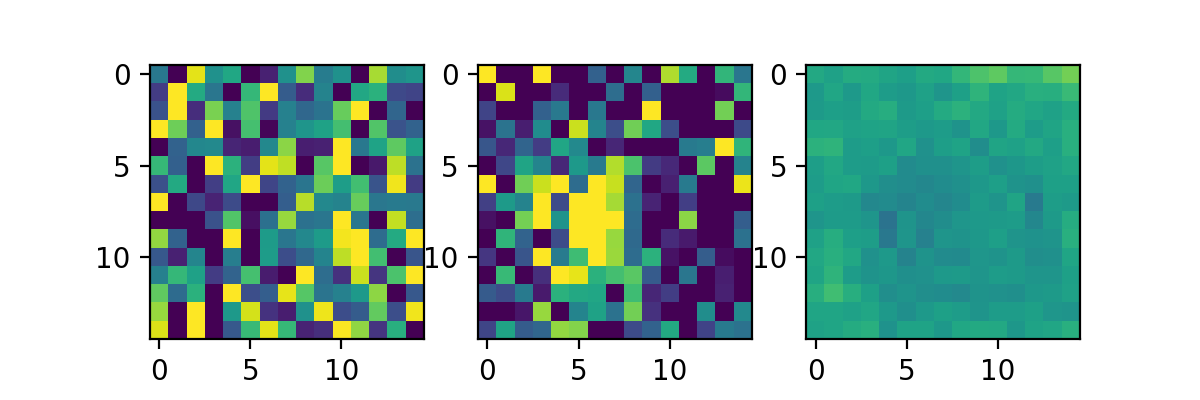

In [131]:
%matplotlib notebook
fig, axes = P.subplots(1,3,figsize=(6,2))
axes[0].imshow(res[0],vmin=-0.05,vmax=0.05)
axes[1].imshow(res[100],vmin=-0.05,vmax=0.05)
axes[2].imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)




<IPython.core.display.Javascript object>


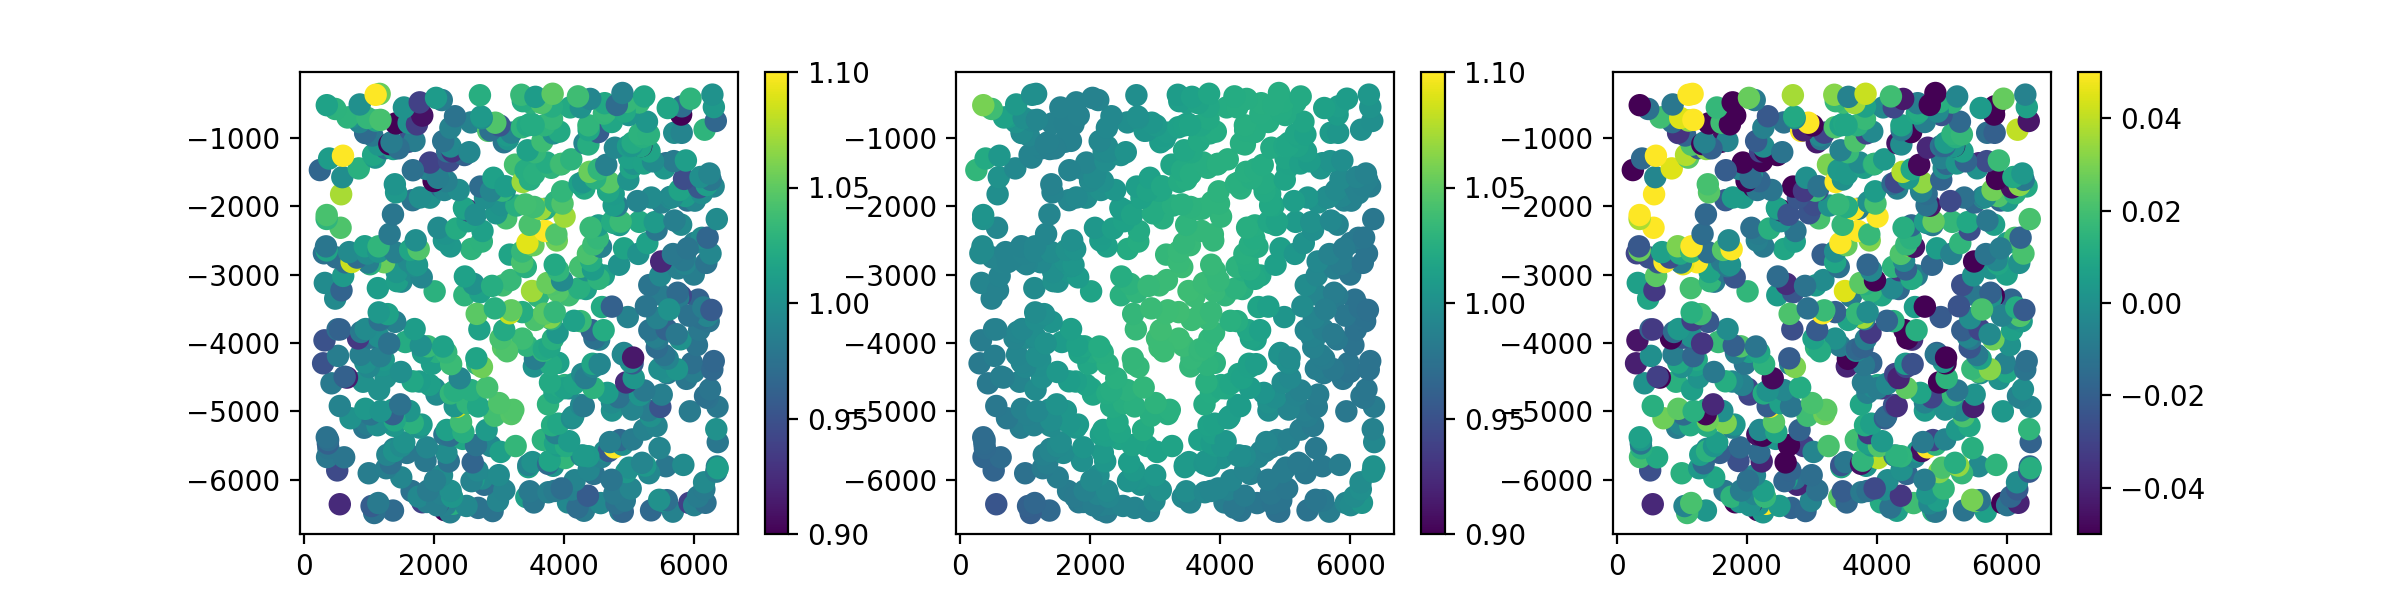

In [142]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=50,vmin=-0.05,vmax=0.05)
fig.colorbar(s,ax=axes[2])

1.3759523865570955
[[ 300  300  300 ...  300  300  300]
 [ 310  310  310 ...  310  310  310]
 [ 320  320  320 ...  320  320  320]
 ...
 [5970 5970 5970 ... 5970 5970 5970]
 [5980 5980 5980 ... 5980 5980 5980]
 [5990 5990 5990 ... 5990 5990 5990]] [[-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]
 ...
 [-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]]


<IPython.core.display.Javascript object>


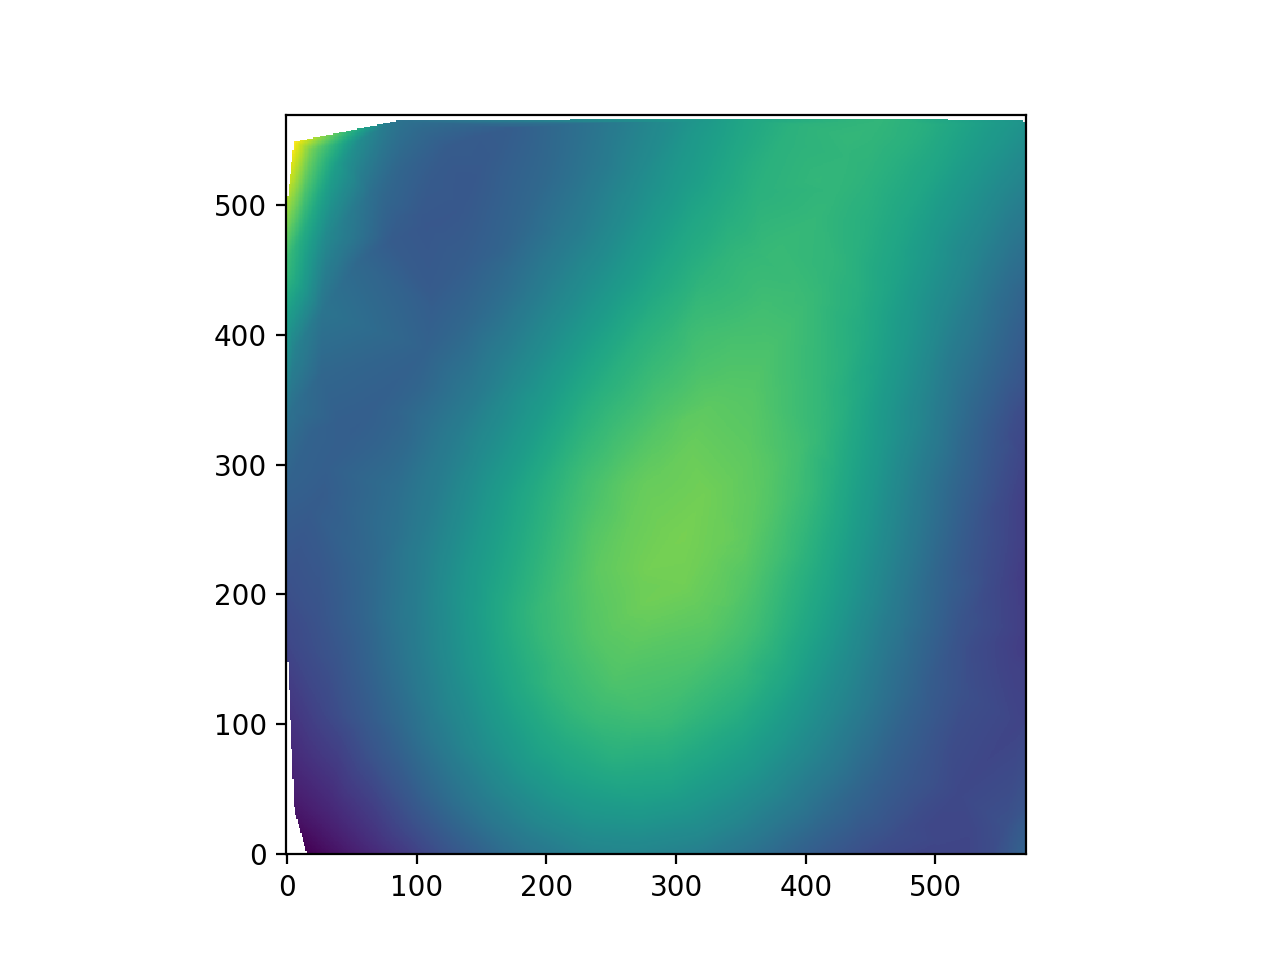

<IPython.core.display.Javascript object>


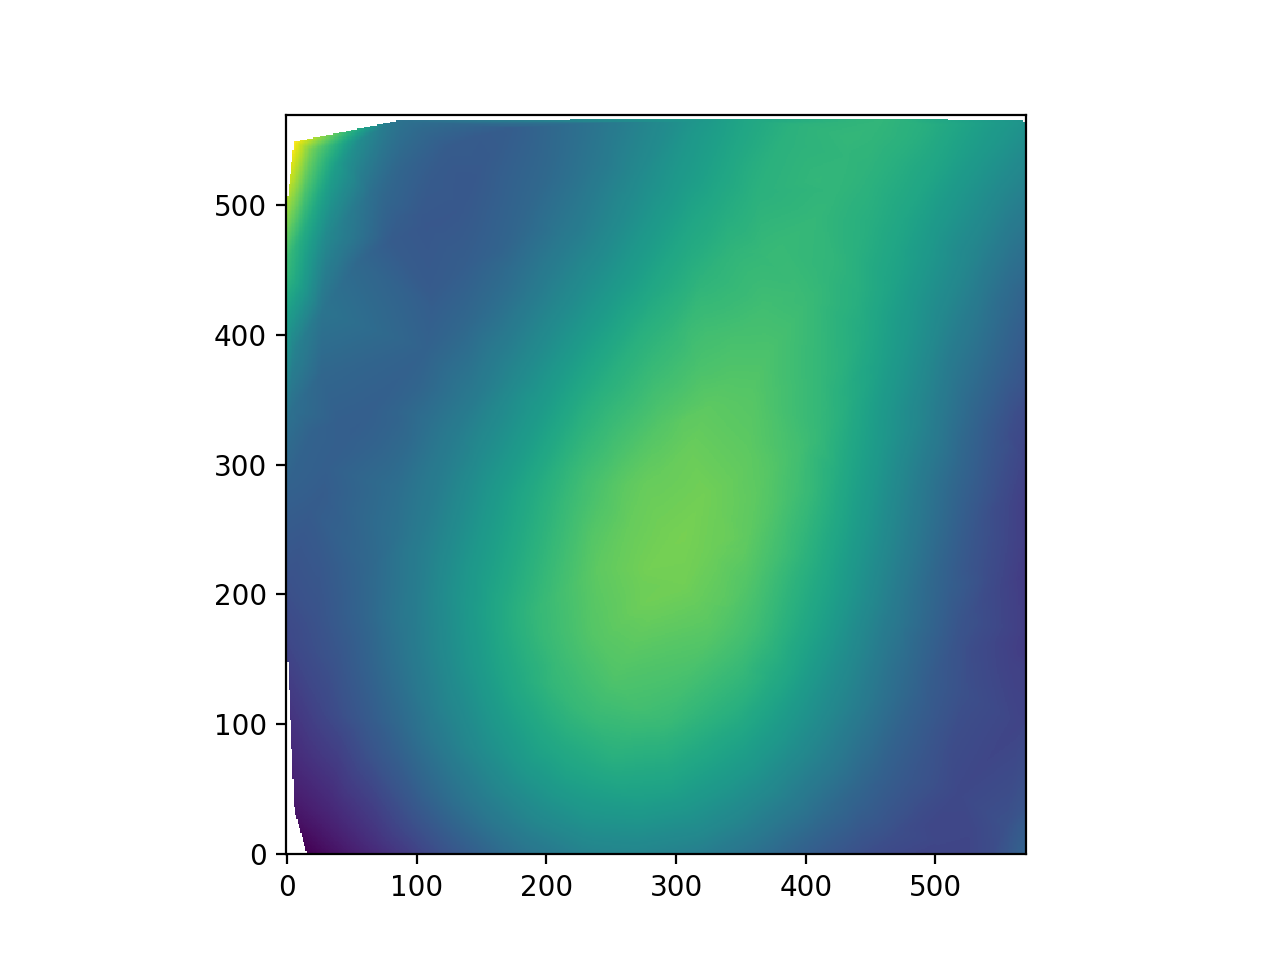

In [200]:
from scipy.interpolate import interp2d,griddata,LinearNDInterpolator,CloughTocher2DInterpolator
interp = LinearNDInterpolator(N.asarray([shapes['u'],shapes['v']]).T, shapes['T_model'])
#interp = CloughTocher2DInterpolator(N.asarray([shapes['u'],shapes['v']]).T, shapes['T_data'])

#interp = interp2d(shapes['u'],shapes['v'],shapes['T_data'])

print(interp(3000,-3000))
umin,umax,vmin,vmax = N.min(shapes['u']),N.max(shapes['u']),N.min(shapes['v']),N.max(shapes['v'])
u,v = N.mgrid[300:6000:10,-6000:-300:10]
print(u,v)
i = interp(u.ravel(),v.ravel()).reshape(u.shape)
fig, ax = P.subplots()
ax.imshow(i.T,origin='lower')

import pickle
with open('interpolator.pkl', 'wb') as f:
    pickle.dump(interp, f)
with open('interpolator.pkl', 'rb') as f:
    interp = pickle.load(f)
    
i = interp(u.ravel(),v.ravel()).reshape(u.shape)
fig, ax = P.subplots()
ax.imshow(i.T,origin='lower')

In [170]:
star = stars[10]
interp = z.psf.interp
interp._orders
x,y = interp.getProperties(star)
print(x**2*y**2)
print(x**4)
z.psf.interp.basis(star)

3249059993202.191
166910438227.34973


array([ 1.00000000e+00, -2.82005768e+03,  7.95272531e+06, -2.24271441e+10,
        6.32458398e+13,  6.39176610e+02, -1.80251491e+06,  5.08319601e+09,
       -1.43349059e+13,  4.08546739e+05, -1.15212537e+09,  3.24905999e+12,
        2.61133520e+08, -7.36411588e+11,  1.66910438e+11])

In [156]:
0 1
a + x + y 3 (+2)
a +x +y +x^2 +y^2 + xy 6 (+3)
+ x^3 + y^2 + xy^2 + x^2y 10(+4)
+ x^4 +y^4  + xy^3  + yx^3 + x^2y^2 10(+5)


11

In [164]:
interp.q.shape

(225, 15)